<a href="https://colab.research.google.com/github/kleeresearch/TextAnalysis/blob/master/Course/Day4/15_Hier_clustering_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('/content/drive/MyDrive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day3/python_code/cluster_example_data.csv')
data = data.values

In [5]:
np.random.shuffle(data)

In [6]:
X = data[:,:-1]
ids = data[:,-1]

In [7]:
X

array([[25, 15],
       [38, 20],
       [40,  3],
       [52, 10],
       [48,  4],
       [25,  5],
       [25,  3],
       [34, 18],
       [52, 22],
       [24, 10],
       [52,  2],
       [44, 12],
       [44,  8],
       [30,  2],
       [30,  3],
       [34, 22],
       [34,  5],
       [60,  2],
       [25, 18],
       [52,  4],
       [44,  2],
       [34, 15],
       [48,  5],
       [60, 19],
       [52,  4],
       [48, 18]])

In [8]:
import matplotlib.pyplot as plt

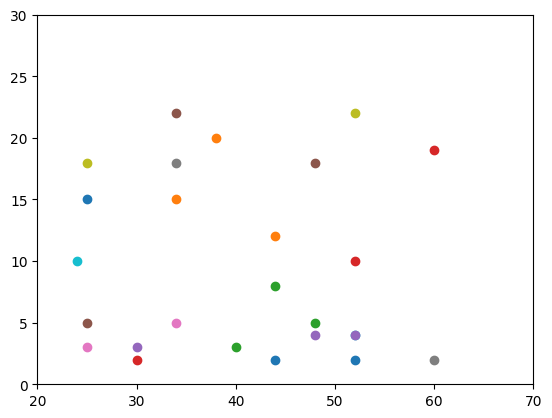

In [9]:
for V in X:
    plt.scatter(V[0],V[1])
plt.ylim(0, 30) # 경계 지정하기
plt.xlim(20, 70)
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
Agg_cluster = AgglomerativeClustering(linkage='single', affinity='euclidean', n_clusters=4)

In [12]:
cluster_idf = Agg_cluster.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [13]:
cluster_idf.labels_

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1,
       0, 2, 0, 0])

In [14]:
cluster_nums = []
for data_num, cluster_num in enumerate(cluster_idf.labels_):
    cluster_nums.append(cluster_num)
    print(ids[data_num], cluster_num)

11 0
3 1
14 0
25 0
16 0
1 0
19 0
8 1
6 0
12 0
24 0
4 0
23 0
2 0
13 0
9 1
0 0
18 3
10 0
20 0
15 0
21 1
22 0
7 2
17 0
5 0


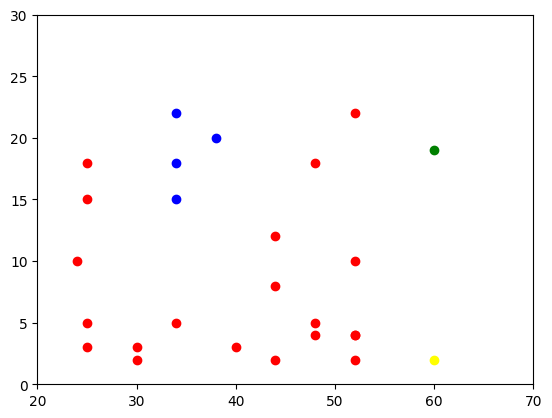

In [15]:
import matplotlib.pyplot as plt
for k in range(len(ids)):
    if cluster_nums[k] == 0:
        plt.scatter(X[k][0],X[k][1], c='red')
    elif cluster_nums[k] == 1:
        plt.scatter(X[k][0],X[k][1], c='blue')
    elif cluster_nums[k] == 2:
        plt.scatter(X[k][0],X[k][1], c='green')
    elif cluster_nums[k] == 3:
        plt.scatter(X[k][0],X[k][1], c='yellow')
plt.ylim(0, 30) # 경계 지정하기
plt.xlim(20, 70)
plt.show()

ward 는 분산을 기준으로 묶는 방법.

분산 정보를 사용하는 ward에서는 사용하지 않음.


In [16]:
cluster_idf1 = AgglomerativeClustering(linkage='ward', n_clusters=4).fit(X)

In [17]:
cluster_idf1.labels_

array([1, 1, 0, 0, 0, 2, 2, 1, 3, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 0, 1,
       0, 3, 0, 3])

11 1
3 1
14 0
25 0
16 0
1 2
19 2
8 1
6 3
12 2
24 0
4 0
23 0
2 2
13 2
9 1
0 2
18 0
10 1
20 0
15 0
21 1
22 0
7 3
17 0
5 3


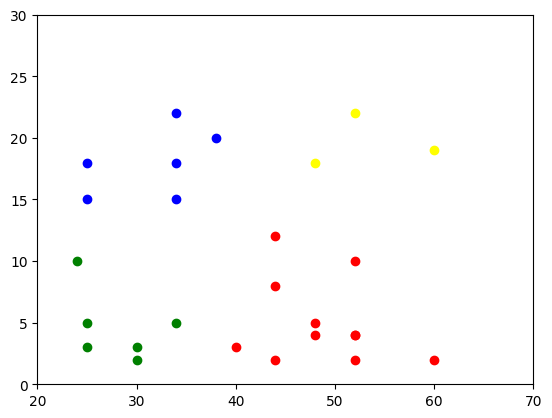

In [18]:
cluster_nums = []
for data_num, cluster_num in enumerate(cluster_idf1.labels_):
    cluster_nums.append(cluster_num)
    print(ids[data_num], cluster_num)
for k in range(len(ids)):
    if cluster_nums[k] == 0:
        plt.scatter(X[k][0],X[k][1], c='red')
    elif cluster_nums[k] == 1:
        plt.scatter(X[k][0],X[k][1], c='blue')
    elif cluster_nums[k] == 2:
        plt.scatter(X[k][0],X[k][1], c='green')
    elif cluster_nums[k] == 3:
        plt.scatter(X[k][0],X[k][1], c='yellow')
plt.ylim(0, 30) # 경계 지정하기
plt.xlim(20, 70)
plt.show()

덴드로그램을 이용해서 위계적 군집 그릴 수 있음.

덴드로그램을 보고 optimal k 가 몇 개인지 생각.

optimal k에 대한 정답은 없음.

연구자 판단으로 결정.

덴드로그램을 이용하면 효과적으로 판단할 수 있다.

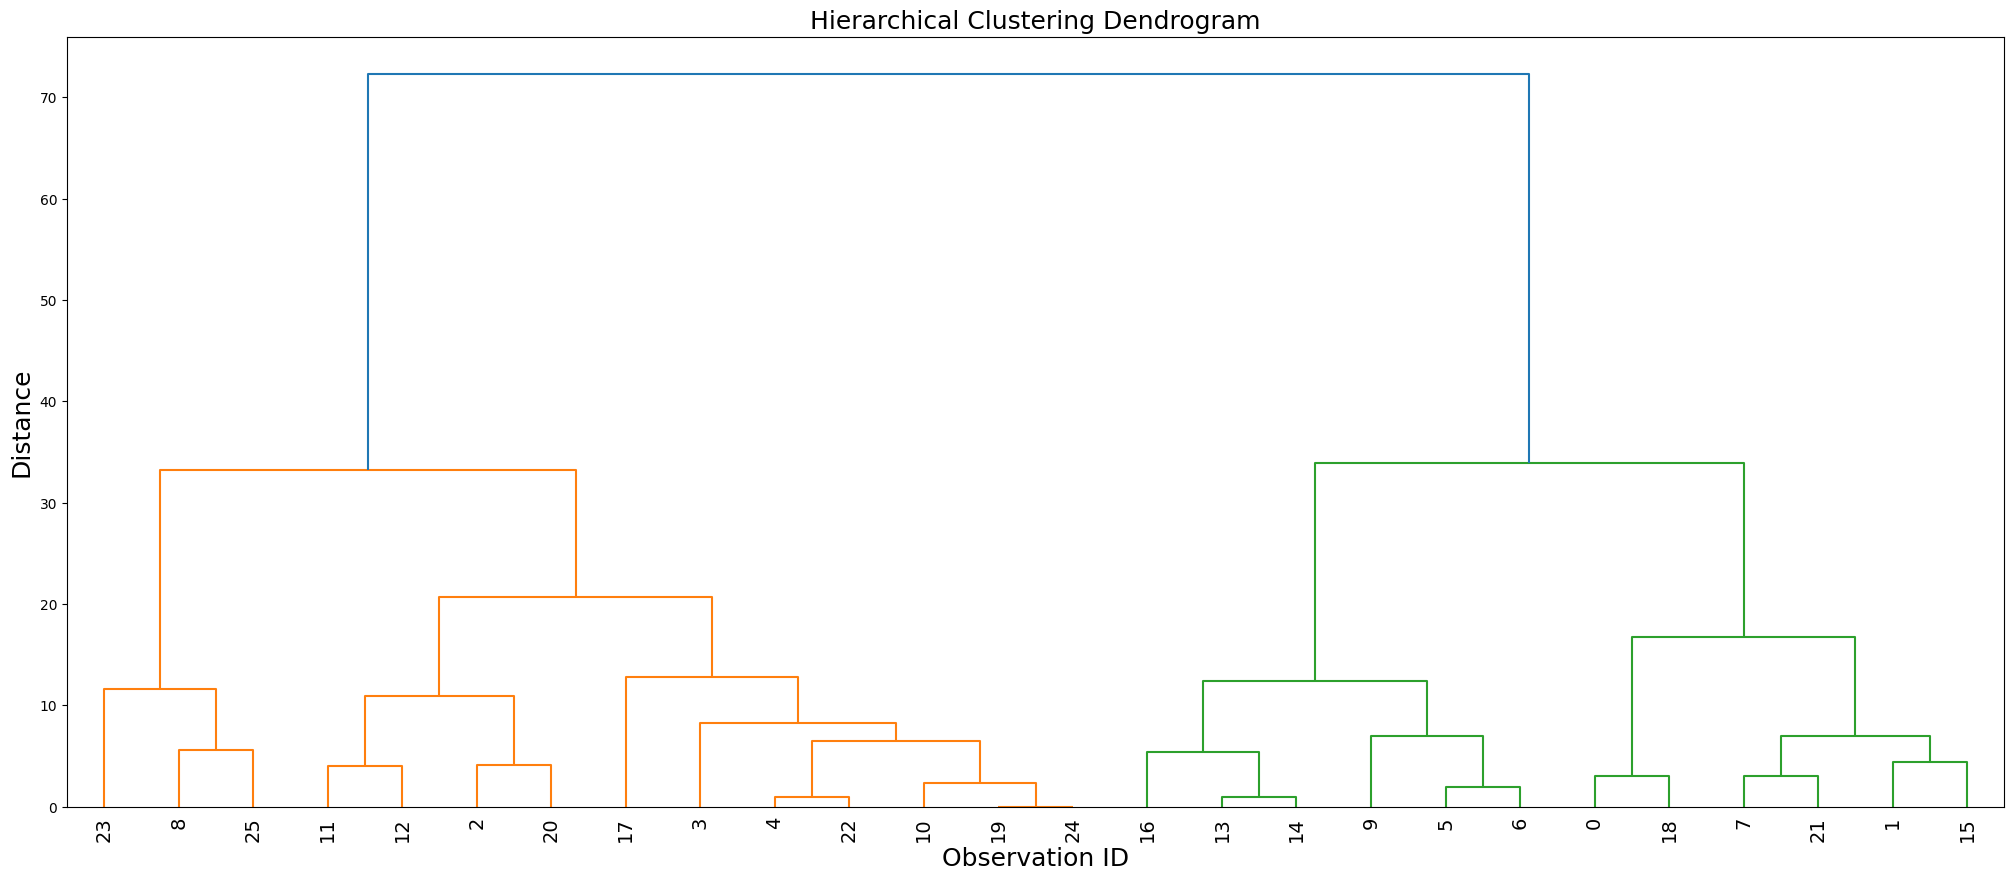

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)
Z = linkage(X, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram', fontsize=18)
plt.xlabel('Observation ID', fontsize=18)
plt.ylabel('Distance', fontsize=18)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
)
plt.show()